# Week 1 Group Projects

This notebook is a template workspace for the week 1 group projects involving
the [Reproducible Brain Charts](https://reprobrainchart.github.io/) (RBC)
database. Herein, we demonstrate how to access the RBC data and demonstrate a
linear regression analysis on the dataset.

## Getting Started with RBC Data

To load in some of the RBC data, we'll use some tools already installed on the
HUB: `rbclib` and `pandas`.
The `rbclib` library allows us to access RBC data from the cloud; it is
demonstrated below.

The `pandas` library handles spreadsheet data (called `DataFrame`s in Python)
and can read tab-separated and comma-separated value files (`*.tsv` and
`*.csv` files).

In [1]:
# We will need the RBCPath type from the rbclib package to load data from the RBC.
from rbclib import RBCPath

# We'll also want to load some data directly from the filesystem.
from pathlib import Path

# We'll want to load/process some of the data using pandas and numpy.
import pandas as pd
import numpy as np

### Accessing the PNC Dataset

The RBC project contains many datasets; for this project, we will focus on
just one of these datasets: the
[Philadelphia Neurodevelopmental Cohort](
https://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html)
(PNC). The PNC contains a lot of data, including raw MRI data. However, due to
the time constraints for this project, we suggest that teams focus on the
already processed data provided by the RBC, which is described below.

The RBC's data is stored in a combination of GitHub repositories and Amazon S3
buckets. The RBC GitHub repositories all belong to the organization
[`ReproBrainChart`](https://github.com/ReproBrainChart), and each contains a
subset of the data for one of the RBC datasets; for the PNC dataset, all
repositories names start with `PNC_`:

* `PNC_FreeSurfer`: structural data processed by FreeSurfer.
* `PNC_BIDS`: raw MRI scan data in the
  [Brain Imaging Data Structure](https://bids.neuroimaging.io/index.html)
  format.
* `PNC_CPAC`: processed functional MRI data.

One typically accesses the RBC using the [`datalad`](https://www.datalad.org/)
tool (see the [RBC page on accessing the data](
https://reprobrainchart.github.io/docs/get_data) for more information).
However, we will access the data using the `RBCPath` type that was imported in
the code-cell above (`from rbclib import RBCPath`). This type inherits from a
type called `CloudPath` (from the library [`cloudpathlib`](
https://cloudpathlib.drivendata.org/stable/)); it represents the path of a
file in the RBC dataset and can be used to access data in thecloud as if it
were local.

For example, the following cell creates an `RBCPath` to a subject's FreeSurfer
data directory then lists and prints the contents.

In [2]:
# This path refers to the repo github.com:ReproBrainChart/PNC_FreeSurfer;
# Subject 1000393599's directory is used as an example.
subject_id = 1000393599
# To browse the repo, use this link:
# https://github.com/ReproBrainChart/PNC_FreeSurfer/tree/main
sub_path = RBCPath(f'rbc://PNC_FreeSurfer/freesurfer/sub-{subject_id}')

# This path refers to a directory:
assert sub_path.is_dir()

# Print each file in the directory:
for file in sub_path.iterdir():
    print(repr(file))

RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.json')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_freesurfer.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsLR_den-164k.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsaverage.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv')


If we want to open and load one of these files, we can do so using the
`RBCPath.open` method. This method is like the `Path.open` method (from the
built-in Python library [`pathlib`](1)). For example, if we want to load this
subject's `regionsurfacestats.tsv` file, we can do so as follows.

[1]: https://docs.python.org/3/library/pathlib.html

In [3]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_regionsurfacestats.tsv'

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv ...


,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


### Getting the Participant Lists and Metadata

We have pre-sorted the participants in the PNC study into a training and a
test dataset. Basic metadata about each participant can be found in TSV files
in the `shared` directory in your home directory.

In [4]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907,-0.449373,-0.630780,-1.842178,1
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061,0.531072,0.392751,0.190706,1
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375,-0.744118,-0.314187,-0.432662,1
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807,-0.896835,-0.449099,0.111167,1
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100,-0.313455,2.204168,-0.782266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN,-0.148520,0.556444,0.024228,1
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN,0.993806,1.578177,-0.373470,1
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN,-1.026645,-0.582212,1.333857,1
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN,0.360029,-0.515655,1.509584,114


Check lengths of training and testing sets

In [28]:
data= load_fsdata('997818717')

In [62]:
data.columns

Index(['subject_id', 'session_id', 'atlas', 'hemisphere', 'StructName',
       'NumVert', 'SurfArea', 'GrayVol', 'ThickAvg', 'ThickStd', 'MeanCurv',
       'GausCurv', 'FoldInd', 'CurvInd', 'Index', 'SegId', 'Mean_wgpct',
       'StdDev_wgpct', 'Min_wgpct', 'Max_wgpct', 'Range_wgpct', 'SNR_wgpct',
       'Mean_piallgi', 'StdDev_piallgi', 'Min_piallgi', 'Max_piallgi',
       'Range_piallgi'],
      dtype='object')

Check distribution of p_factor

In [6]:
import matplotlib.pyplot as plt

(array([327., 129., 144., 153., 130.,  84.,  54.,  30.,  11.,   5.]),
 array([-1.6083745 , -1.19192914, -0.77548378, -0.35903842,  0.05740694,
         0.4738523 ,  0.89029766,  1.30674302,  1.72318838,  2.13963374,
         2.5560791 ]),
 <BarContainer object of 10 artists>)

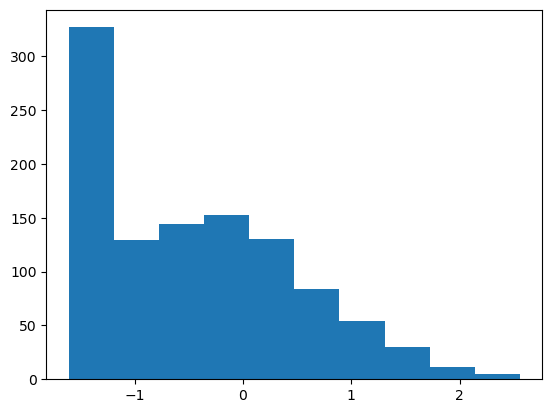

In [7]:
plt.hist(train_data['p_factor'])

###  0. Load functions

In [38]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    # Return the loaded data:
    return data

def load_features(participant_id, feature, atlas):
    """
    Load features for a specific participant, filtered by atlas.
    
    Parameters:
    -----------
    participant_id : str or int
        Identifier for the participant
    feature : str, default 'SurfArea'
        Name of the feature column to extract
    atlas : str, default 'glasser'
        Name of the atlas to filter regions by
        
    Returns:
    --------
    pd.Series
        Feature values for regions in the specified atlas
    """
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)
    
    # Filter data to only include regions from the specified atlas
    atlas_data = data[data['atlas'] == atlas]
    
    # Extract the feature column for the filtered regions
    feature_atlas_roi = atlas_data.loc[:, feature]
    
    # And return this value:
    return feature_atlas_roi
    

def prep_data_for_model(data_frame, feature, atlas, num_features=362):
    features_matrix = []
    p_factor = []
    valid_participants = []
    
    all_data_indexed = data_frame.set_index('participant_id')
    
    for participant_id in data_frame['participant_id']:
        try:
            # Get surface area for all ROIs for this participant
            roi_features = load_features(participant_id, feature=feature, atlas=atlas)
            if roi_features is not None and len(roi_features) == num_features:
                features_matrix.append(roi_features.values)  
                p_factor.append(all_data_indexed.loc[participant_id, 'p_factor'])
                valid_participants.append(participant_id)

            
            else:
                print(f"Skipping participant {participant_id}: no valid data, {len(roi_features)}")
                
        except Exception as e:
            print(f"Error loading data for participant {participant_id}: {e}")
            continue
    
    print(f"Successfully loaded data for {len(valid_participants)} out of {len(data_frame)} participants")
    
    X = np.array(features_matrix)
    y = np.array(p_factor)
    
    return X, y

## 1. Collect features to construct feature matrix

In [39]:
# Import the LinearRegression type:
from sklearn.linear_model import ElasticNet, LinearRegression, ElasticNetCV
from sklearn.model_selection import train_test_split

In [63]:
#Specify features - MAKE CHANGES HERE!! 
feature = 'GrayVol'
atlas = 'aparc.DKTatlas'

In [ ]:
X, y = prep_data_for_model(train_data, feature = feature, atlas = atlas, num_features = 62) #num features referes to number of expected features to check the length
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Error loading data for participant 1342487188: [Errno 2] No such file or directory: '/home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1342487188/sub-1342487188_regionsurfacestats.tsv'
Error loading data for participant 1649551035: [Errno 2] No such file or directory: '/home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1649551035/sub-1649551035_regionsurfacestats.tsv'
Error loading data for participant 1910420386: name 'roi' is not defined
Error loading data for participant 2003542642: [Errno 2] No such file or directory: '/home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-2003542642/sub-2003542642_regionsurfacestats.tsv'
Error loading data for participant 219325366: [Errno 2] No such file or directory: '/home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-219325366/sub-219325366_regionsurfacestats.tsv'
Error loading data for participant 2249226316: [Errno 2] No such file or directory: '/home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-2249226316

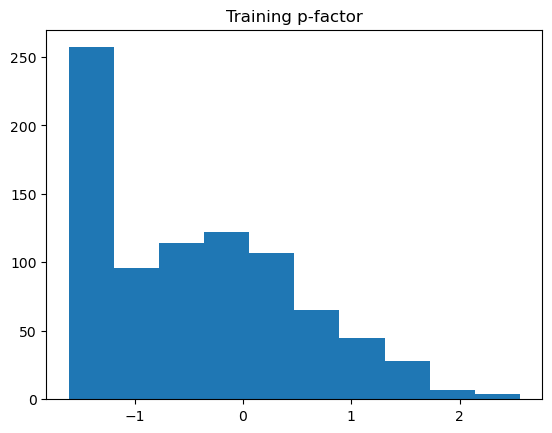

In [59]:
#Compare distributions of y_train and y_val -> check they are similar

plt.hist(y_train)
plt.title('Training p-factor')
plt.show()

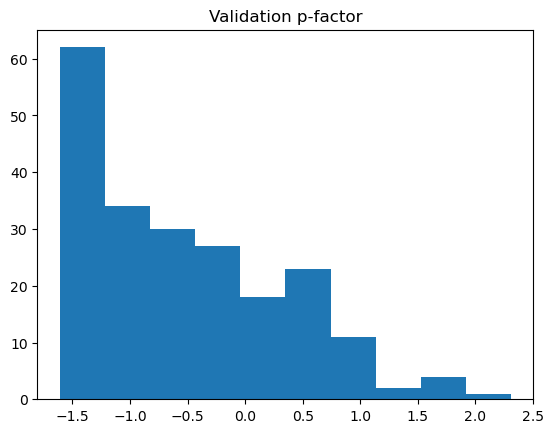

In [60]:
plt.hist(y_val)
plt.title('Validation p-factor')
plt.show()

## 2. Run model

### 2.1. Initialise model - no hyperparameter tuning

In [44]:
####Specify parameters for the regression - MAKE CHANGES HERE
alpha = 0.1
l1_ratio = 0.5

In [45]:
#Running Elastic net
# Train the regression using the training matrix:
en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
en.fit(X_train, y_train)
# Display the trained regression parameters:
print("Elastic regression:")
print("  Intercept:", en.intercept_)
print("  Slope:", en.coef_)

Elastic regression:
  Intercept: -0.15786634270962008
  Slope: [-2.37937604e-06  2.70343568e-05  2.34410581e-04 -1.01893891e-03
 -3.08834302e-05 -5.08687232e-05  5.06164900e-05  5.52967327e-04
  2.42131527e-06 -1.12803217e-04 -1.06022819e-04  3.59860035e-04
 -6.90896981e-05  4.04916616e-04  1.48820234e-04  1.48287965e-04
  8.04262999e-05 -8.33248712e-05  1.46119900e-04 -8.53094553e-05
  6.15957604e-05  1.51360249e-04 -8.94529910e-05 -2.35916903e-05
 -1.26863858e-06 -5.98675958e-05  8.99176989e-05  1.70309736e-04
  1.63751604e-05 -1.19670100e-03  1.69691049e-04 -3.07121708e-04
 -1.34401599e-04 -2.46436277e-05  1.12764608e-03 -9.05807975e-05
 -6.48931993e-06  2.70606746e-05 -8.10917324e-05 -2.09912642e-05
  4.94545693e-05  2.63206415e-05 -7.63315157e-05 -3.09746395e-05
  4.02148435e-04  2.71454786e-04 -3.68291279e-04 -5.80394504e-05
  1.23347087e-04 -2.96945954e-04  5.89689612e-05 -8.90205263e-05
  3.73175783e-05 -3.54307167e-06  1.75918641e-04 -9.88415394e-05
 -2.43571657e-05 -2.4804946

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+01, tolerance: 7.456e-02
  model = cd_fast.enet_coordinate_descent(


### 2.1.2 Test on validation set

In [50]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

y_pred = en.predict(X_val)
mse = np.mean((y_val - y_pred) ** 2)

# Calculate R (Pearson correlation coefficient)
r_value, p_value = pearsonr(y_val, y_pred)

# Calculate R² (coefficient of determination)
r2 = r2_score(y_val, y_pred)

# Print all metrics
print(f"Test MSE: {mse:.4f}")
print(f"R (Pearson correlation): {r_value:.4f}")
print(f"R² (coefficient of determination): {r2:.4f}")
print(f"P-value for correlation: {p_value:.4f}")

Test MSE: 0.8616
R (Pearson correlation): 0.0250
R² (coefficient of determination): -0.0830
P-value for correlation: 0.7169


### 2.2 Initialise model - hyperparameter tuning

In [47]:
### MAKE CHANGES HERE
l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9] # Different L1/L2 mixing ratios
alphas=np.logspace(-4, 1, 50)      # Range of regularization strengths   
max_iter = 2000

In [48]:
elasticnet_cv = ElasticNetCV(
    l1_ratio=l1_ratio,  # Different L1/L2 mixing ratios
    alphas=alphas,        # Range of regularization strengths                              # 5-fold cross-validation
    random_state=42,
    max_iter=max_iter
)

# Fit the model
elasticnet_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03, 6.86648845e-03, 8.68511374e-03,
       1.09854114e-02, 1.389495...
       7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01]),
             l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9], max_iter=2000,
             random_state=42)

### 2.2.2 Test on validation set

In [51]:
y_pred = elasticnet_cv.predict(X_val)
mse = np.mean((y_val - y_pred) ** 2)

# Calculate R (Pearson correlation coefficient)
r_value, p_value = pearsonr(y_val, y_pred)

# Calculate R² (coefficient of determination)
r2 = r2_score(y_val, y_pred)

# Print all metrics
print(f"Test MSE: {mse:.4f}")
print(f"R (Pearson correlation): {r_value:.4f}")
print(f"R² (coefficient of determination): {r2:.4f}")
print(f"P-value for correlation: {p_value:.4f}")

Test MSE: 0.8172
R (Pearson correlation): 0.0599
R² (coefficient of determination): -0.0271
P-value for correlation: 0.3853


### Step 3. Predict the `p_factor` of the Test Data

In [ ]:
## to do - predict on test set